In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import updater as db
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "jupyterlab"

In [2]:
database_name = "PRICES_DAILY"
db_info, data_source_info = db.parse_creds(db.cred_file, database_name=database_name) # did you create creds.yaml?
sql_conn, sql_cursor = db.mysql_connect(
    host=db_info['host'],
    user=db_info['user'],
    password=db_info['password'],
    database=database_name)

In [3]:
# what ETF symbols do we have in the database?
print(db.get_etf_tickers().keys())

dict_keys(['AGG', 'BND', 'HYG', 'IVW', 'IWB', 'IWM', 'JNK', 'QQQ', 'SPY', 'TBX', 'USO', 'UUP', 'VNQ'])


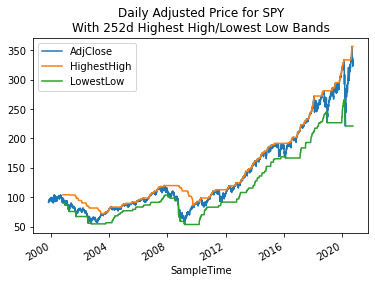

In [4]:
# show trailing highest high/lowest low with matplotlib for SPY
symbol = 'SPY'
hhll_length = 252
data = pd.read_sql('CALL GetSecurityData("{}")'.format(symbol), con=sql_conn).set_index("SampleTime")
ax = data.AdjustedClosePrice.plot(
    title="Daily Adjusted Price for {}\nWith {}d Highest High/Lowest Low Bands".format(symbol, hhll_length))
data.AdjustedClosePrice.rolling(hhll_length).max().plot(ax=ax)
data.AdjustedClosePrice.rolling(hhll_length).min().plot(ax=ax)
_ = plt.legend(["AdjClose", "HighestHigh", "LowestLow"])

In [5]:
# show trailing highest high/lowest low with Plotly

plot_data = go.Scatter(x=data.index, y=data.AdjustedClosePrice, name="AdjClose")
plot_data_hh = go.Scatter(x=data.index, y=data.AdjustedClosePrice.rolling(hhll_length).max(), name="HighestHigh")
plot_data_ll = go.Scatter(x=data.index, y=data.AdjustedClosePrice.rolling(hhll_length).min(), name="LowestLow")

fig = make_subplots(rows=1, cols=1)
fig.add_trace(plot_data, row=1, col=1)
fig.add_trace(plot_data_hh, row=1, col=1)
fig.add_trace(plot_data_ll, row=1, col=1)

fig.update_layout(title=go.layout.Title(
    text="Daily Adjusted Price for {} with {}d Highest High/Lowest Low Bands".format(symbol, hhll_length), 
    xref="paper", x=0))
    
fig.show()